Aaron Floreani -
ITP 449, Spring 2021 -
31854: Applications of Machine Learning - 
Write Up Article:
https://floreani.medium.com/day-trading-bitcoin-an-exploratory-analysis-using-historical-bitcoin-data-c0865383ebf5

In [ ]:
# Import all the packages and upload the CSV data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

In [7]:
import datetime as dt
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# store it into a pandas dataframe
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
print(df.head())

    Timestamp  Open  High  ...  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0  1325317920  4.39  4.39  ...      0.455581                2.0            4.39
1  1325317980   NaN   NaN  ...           NaN                NaN             NaN
2  1325318040   NaN   NaN  ...           NaN                NaN             NaN
3  1325318100   NaN   NaN  ...           NaN                NaN             NaN
4  1325318160   NaN   NaN  ...           NaN                NaN             NaN

[5 rows x 8 columns]


In [9]:
# Examine the shape and information in the data
print(df.shape)
print(df.describe())


(4727777, 8)
          Timestamp          Open  ...  Volume_(Currency)  Weighted_Price
count  4.727777e+06  3.484305e+06  ...       3.484305e+06    3.484305e+06
mean   1.467409e+09  4.570658e+03  ...       3.315691e+04    4.570625e+03
std    8.203749e+07  4.775105e+03  ...       1.129107e+05    4.775090e+03
min    1.325318e+09  3.800000e+00  ...       0.000000e+00    3.800000e+00
25%    1.396235e+09  4.321900e+02  ...       4.147936e+02    4.321753e+02
50%    1.467540e+09  3.085010e+03  ...       3.305199e+03    3.085478e+03
75%    1.538456e+09  8.158010e+03  ...       2.158297e+04    8.157964e+03
max    1.609373e+09  2.899738e+04  ...       1.044599e+07    2.898589e+04

[8 rows x 8 columns]


In [10]:
# Star of cleaning the data. Converting Timestamp to datetime64
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
# sets the index as the date
df.index = df.Timestamp
df.head()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Resample the data to the average daily value of each column. Removes excessive frequency
df = df.resample('D').mean()
# drops any missing values that are present
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [12]:
print(df.shape)
# 3,000 rows instead of 4 million with no missing valeus and accurate datetime information

(3286, 7)


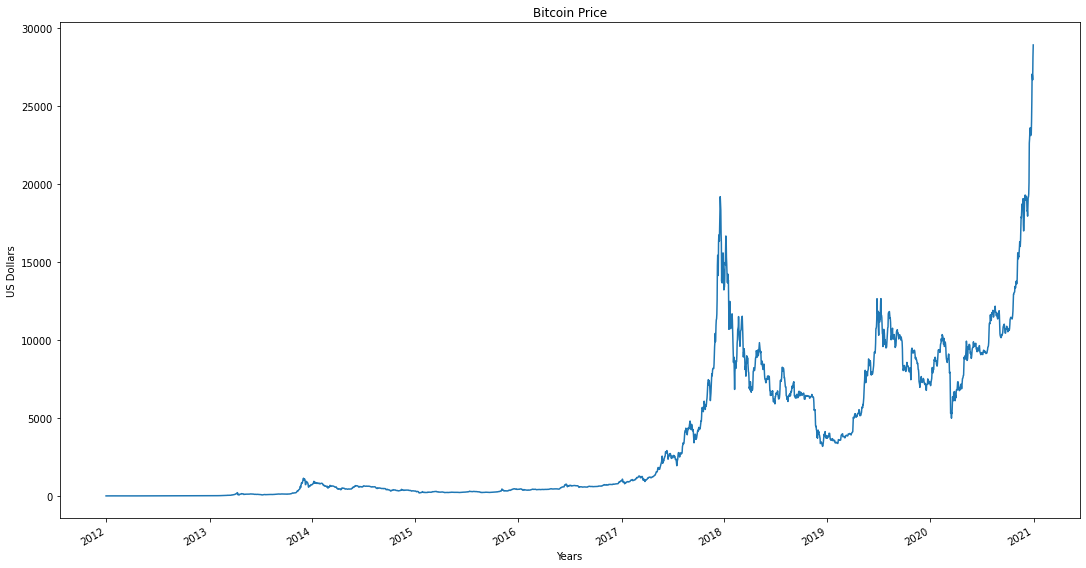

In [13]:
# graph bitcoin price over the years
df.Weighted_Price.plot(title = "Bitcoin Price", figsize=(15,8))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

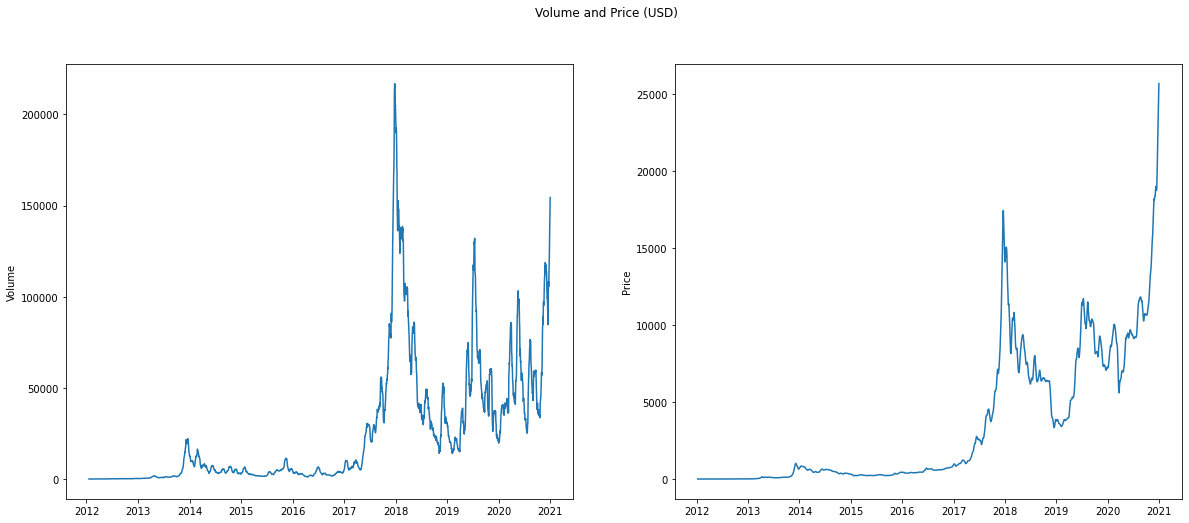

In [14]:

# graph bitcoin price compared to volume to find correlation

fig.suptitle('Volume and Price (USD)')
ax1.set_ylabel('Volume')
ax2.set_ylabel('Price')
ax1.plot(df.index, df["Volume_(Currency)"].rolling(20).mean())
ax2.plot(df.index, df['Weighted_Price'].rolling(10).mean())
ax1.tick_params(labelrotation=0)
ax2.tick_params(labelrotation=0)
plt.show()

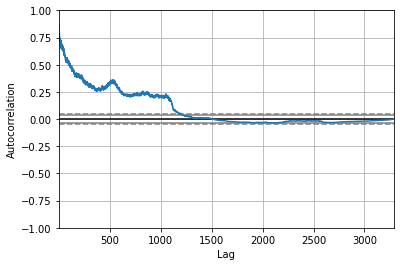

In [14]:
from pandas.plotting import autocorrelation_plot
# This information proved to be unseful but I left it in
autocorrelation_plot(df)
plt.show()


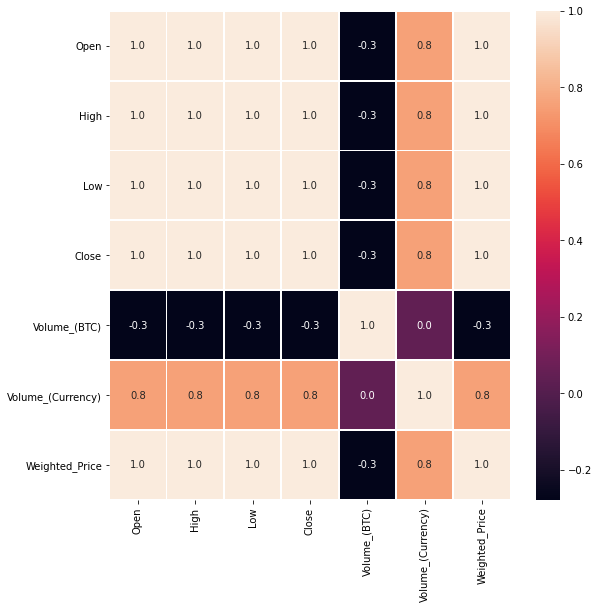

In [15]:
# Displays the correlation between all the variables
df.corr()
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.9, fmt= '.1f',ax=ax)
plt.show()

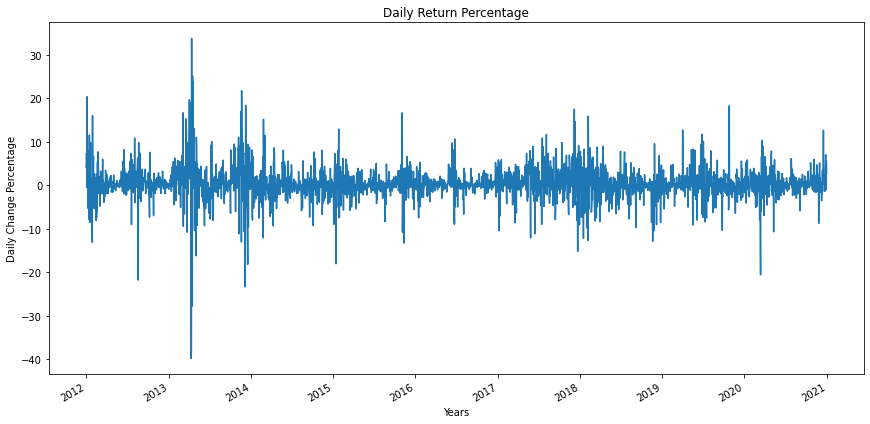

In [16]:
# Daily return percentage over the years. Added new column dataframe to graph
df['Daily_change_percent'] = df['Close'].pct_change()*100
df.head()
df['Daily_change_percent'].plot(title = "Daily Return Percentage", figsize=(12,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.show()

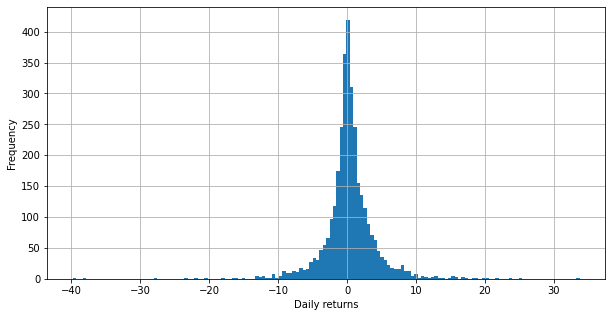

In [46]:
# graph daily returns percentage as histogram
df['Daily_change_percent'].hist(bins = 150, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()

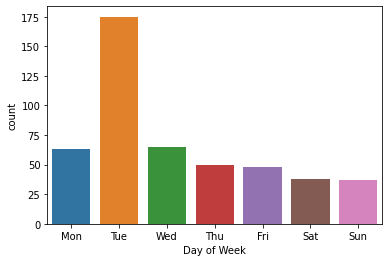

In [23]:
# I had to reset my data in order to make this graph work. Therefore I read the data again into "data"
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data = data.dropna()

week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['Day of Week'] = data['Timestamp'].dt.dayofweek.map(week)

# count min value for each week day
idx = data.groupby([pd.Grouper(key='Timestamp', freq='W-MON')])['Weighted_Price'].transform(min) == data['Weighted_Price']

# data is still in minutes, so I calculate it for days.
lows_count = data[idx].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

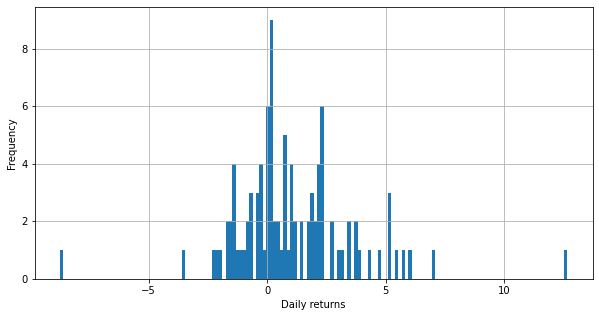

In [21]:
# graph daily returns percentage as histogram within the most recent 100 days
df['Daily_change_percent_recent'] = df['Close'].iloc[-100:].pct_change()*100
df.head()
df['Daily_change_percent_recent'].hist(
bins = 150, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()